In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from imblearn.over_sampling import KMeansSMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import joblib
import shap

/Volumes/Anaconda/anaconda3/envs/ds/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the dataset
df = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
df['Class']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Class, Length: 768, dtype: int64

In [4]:
# Split the data into input and output variables
X = df.drop('Class', axis=1)
y = df['Class']

In [5]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Class, Length: 768, dtype: int64

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Perform K-means-SMOTE oversampling on the training data
kmeans_smote = KMeansSMOTE()
X_train_resampled, y_train_resampled = kmeans_smote.fit_resample(X_train, y_train)

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [8]:
# Train and evaluate the C4.5 decision tree classifier
c45_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
c45_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_c45 = c45_classifier.predict(X_test)
acc_c45 = accuracy_score(y_test, y_pred_c45)
recall_c45 = recall_score(y_test, y_pred_c45)
precision_c45 = precision_score(y_test, y_pred_c45)
f1_c45 = f1_score(y_test, y_pred_c45)
print("Accuracy of C4.5:", acc_c45)
print("C4.5 recall:", recall_c45)
print("C4.5 precision:", precision_c45)
print("C4.5 F1 score:", f1_c45)

Accuracy of C4.5: 0.6883116883116883
C4.5 recall: 0.6
C4.5 precision: 0.5454545454545454
C4.5 F1 score: 0.5714285714285713


In [9]:
# Train and evaluate the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm_classifier.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print("Accuracy of SVM:", acc_svm)
print("SVM recall:", recall_svm)
print("SVM precision:", precision_svm)
print("SVM F1 score:", f1_svm)

Accuracy of SVM: 0.7272727272727273
SVM recall: 0.675
SVM precision: 0.5934065934065934
SVM F1 score: 0.6315789473684211


In [10]:
# Train and evaluate the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_nb = nb_classifier.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
print("Accuracy of Naive Bayes:", acc_nb)
print("Naive Bayes recall:", recall_nb)
print("Naive Bayes precision:", precision_nb)
print("Naive Bayes F1 score:", f1_nb)

Accuracy of Naive Bayes: 0.7142857142857143
Naive Bayes recall: 0.7125
Naive Bayes precision: 0.57
Naive Bayes F1 score: 0.6333333333333333


In [14]:
# Save the trained model to a file
joblib.dump(c45_classifier, 'c45_classifier.pkl')
joblib.dump(svm_classifier, 'svm_classifier.pkl')
joblib.dump(nb_classifier, 'nb_classifier.pkl')


['nb_classifier.pkl']

!pip install shap

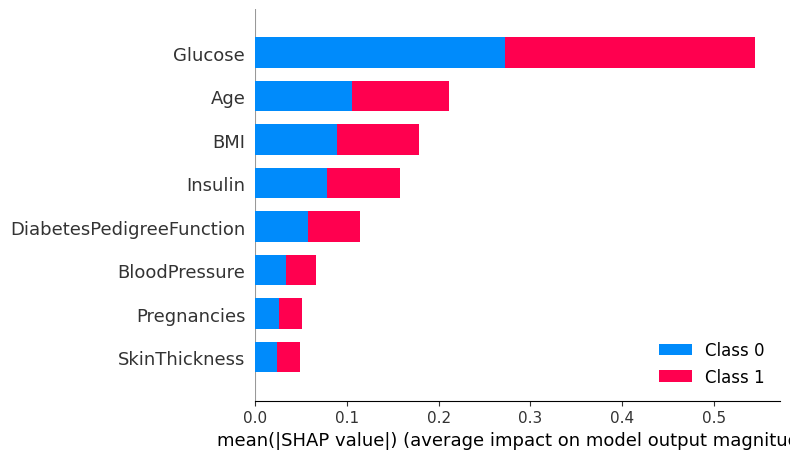

In [11]:
# Create a SHAP TreeExplainer object for the trained Decision Tree model
explainer = shap.TreeExplainer(c45_classifier)

# Generate SHAP values for the testing set
shap_values = explainer.shap_values(X_test)
shap_values_train = explainer.shap_values(X_train)

# Create a SHAP summary plot to visualize feature importance
shap.summary_plot(shap_values, X_test)


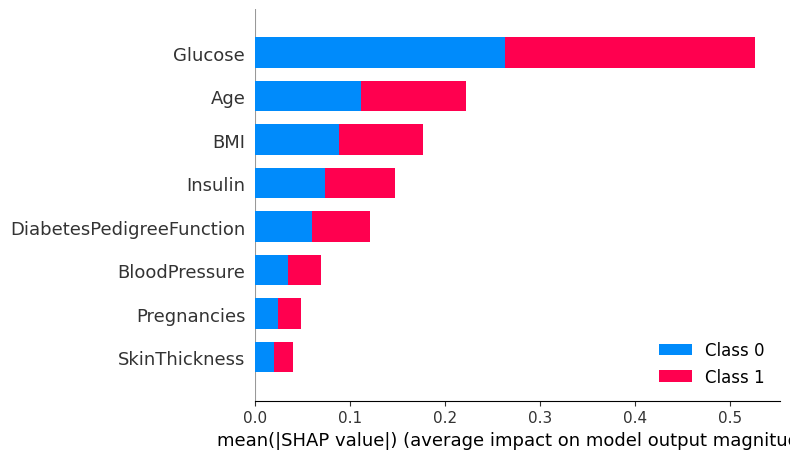

In [12]:
shap.summary_plot(shap_values_train, X_train, feature_names=X.columns)

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


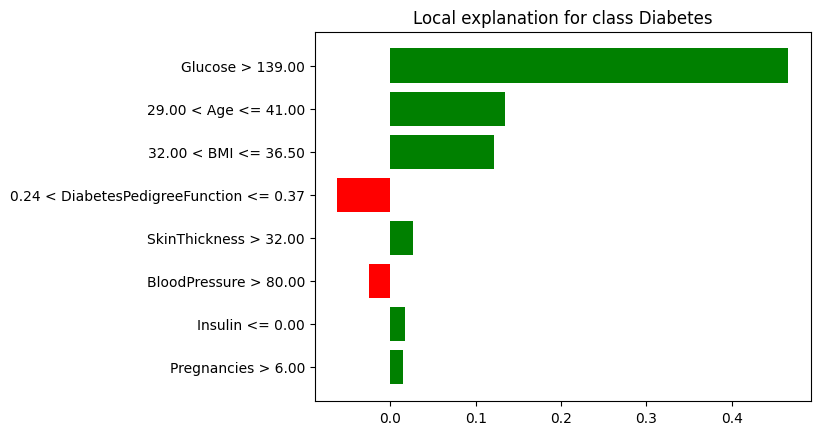

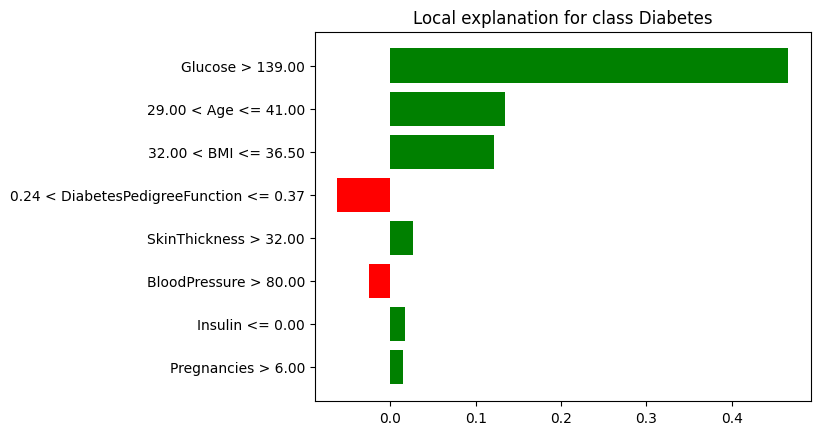

In [13]:
from lime import lime_tabular
from lime.lime_tabular import LimeTabularExplainer

# Create a LIME explainer for the Naive Bayes model
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['No Diabetes', 'Diabetes'])

# Select a random instance from the testing set to explain
instance = X_test.iloc[25]

# Generate an explanation for the prediction made by the Naive Bayes model for the selected instance
explanation = explainer.explain_instance(instance.values, c45_classifier.predict_proba)

# Visualize the LIME explanation using a bar chart
explanation.as_pyplot_figure()